# Frequency and Distribution

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])
trial = 50
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [3]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
print(sort_freq)

3      3
4      5
5      4
6     11
7     14
8      2
9      4
10     1
11     3
12     3
Name: 0, dtype: int64


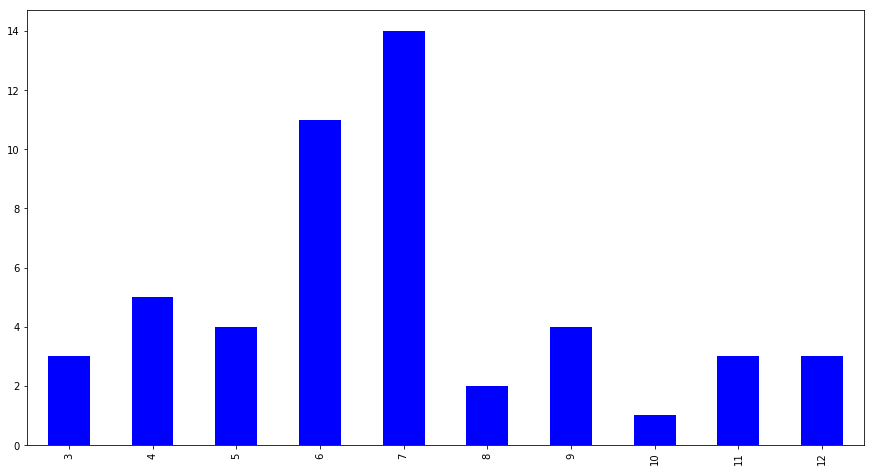

In [4]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(15, 8))

## Relative Frequency

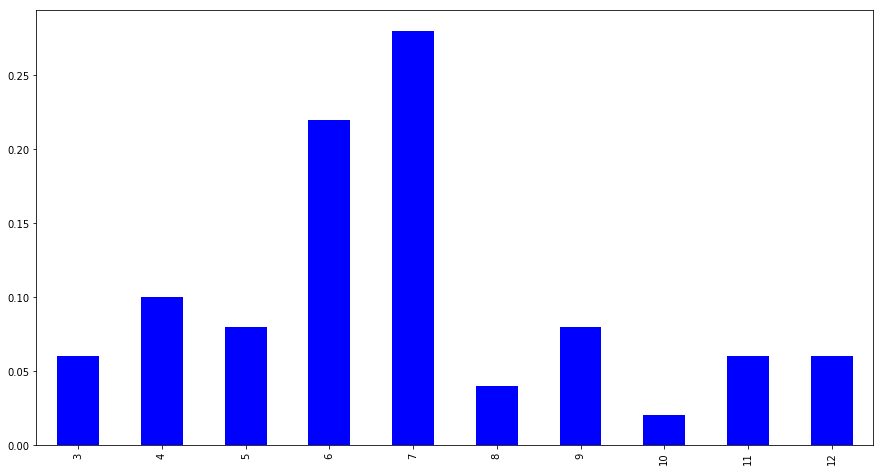

In [5]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

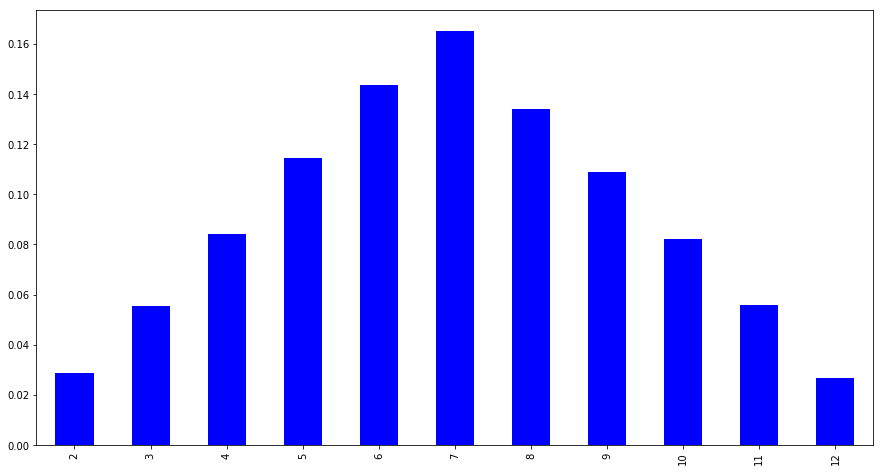

In [6]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(15, 8))

### We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution. Try increasing the number of "trial" further (but it may take some time for Jupyter Notebook to output the result)

## Expectation and Variance of a distribution

In [15]:
# assume that we have fair dice, which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [20]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [21]:
#Output the mean and variance of the distribution. Mean and variance can be used to describe a distribution
print(mean, var)

6.999999999999999 5.833333333333334


## Empirical  mean and variance

In [14]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [15]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.00445 5.77711905345


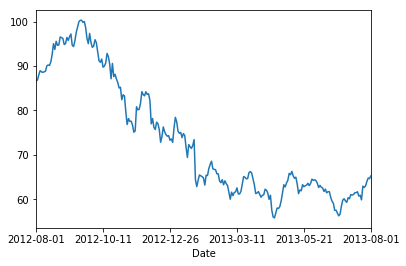

In [8]:
apl = pd.read_csv('../data/apple.csv', index_col=0)
apl.loc['2012-08-01' : '2013-08-01', 'Close'].plot()

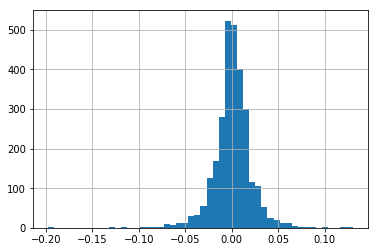

In [11]:
apl['LogReturn'] = np.log(apl['Close']).shift(-1) -np.log(apl['Close'])
apl['LogReturn'].hist(bins=50)

In [12]:
from scipy.stats import norm

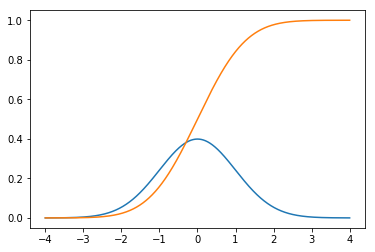

In [25]:
density = pd.DataFrame()
density['x'] = np.arange(-4, 4, 0.0001)
density['pdf'] = norm.pdf(density['x'], 0, 1)
density['cdf'] = norm.cdf(density['x'], 0, 1)
plt.plot(density['x'], density['pdf'])
plt.plot(density['x'], density['cdf'])

In [23]:
mu = apl['LogReturn'].mean()
sigma = apl['LogReturn'].std(ddof=1)
print(mu, sigma)

0.00097546775915 0.0200454476159


In [27]:
denApp = pd.DataFrame()
denApp['x'] = np.arange(-0.1, 0.1, 0.0001)
denApp['pdf'] = norm.pdf(denApp['x'], mu, sigma)

ValueError: Argument dimensions are incompatible

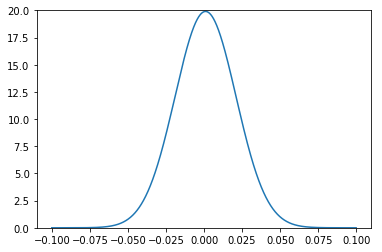

In [38]:
plt.ylim(0, 20)
plt.plot(denApp['x'], denApp['pdf'])
plt.fill_between(x = np.arange(-0.1, 0.1, 0.0001),
                y2 = 0,
                y1 = norm.pdf(np.arange(-0.1, 0.05, 0.0001), mu, sigma),
                facecolor = 'pink',
                alpha = 0.5)

In [40]:
mu220 = 220* mu
sigma220 = 220 ** 0.5 * sigma
print(f"mu220 = {mu220}\nsigma220 = {sigma220}")

print(f"The probability of dropping over 40% in 220 days is {norm.cdf(-0.4, mu220, sigma220)}")

mu220 = 0.21460290701301937
sigma220 = 0.29732203656371775
The probability of dropping over 40% in 220 days is 0.019361015454142615


In [41]:
print(norm.ppf(0.05, mu, sigma))

-0.0319963594557
